# Movielens Data

- 유저가 영화에 대해 평점을 매긴 데이터가 데이터 크기 별로 있음. (MovieLens 1M Dataset 사용을 권장)


- 별점 데이터는 대표적인 explicit 데이터지만, implicit 데이터로 간주하고 테스트


- 별점을 시청횟수로 해석해서 생각


- 유저가 3점 미만으로 준 데이터는 선호하지 않는다고 가정하고 제외

# 데이터 준비와 전처리

In [1]:
import pandas as pd
import os
rating_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/ratings.dat'
ratings_cols = ['user_id', 'movie_id', 'ratings', 'timestamp']
ratings = pd.read_csv(rating_file_path, sep='::', names=ratings_cols, engine='python', encoding = "ISO-8859-1")
original_data_size = len(ratings)
ratings.head()

,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


### 3점 이상 데이터만 남김

In [2]:
ratings = ratings[ratings['ratings']>=3]
filtered_data_size = len(ratings)

print(f'original_data_size: {original_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / original_data_size:.2%}')

original_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


3점 이상 데이터는 전체 데이터에서 총 83.63%

### ratings 컬럼의 이름을 counts로 바꿈

In [3]:
ratings.rename(columns={'ratings' : 'counts'}, inplace=True)

In [4]:
ratings['counts']

0          5
1          3
2          3
3          4
4          5
          ..
1000203    3
1000205    5
1000206    5
1000207    4
1000208    4
Name: counts, Length: 836478, dtype: int64

### 영화 제목을 보기 위해 메타 데이터 읽어오기

In [5]:
movie_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/movies.dat'
cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, sep='::', names=cols, engine='python', encoding='ISO-8859-1')
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


## 하나의 데이터 프레임 생성
- 두 개의 데이터 프레임을 하나의 데이터 프레임으로 생성하여 분석의 효율을 높이고자 한다.
- movie_id를 기준으로 합침

In [6]:
ratings

,user_id,movie_id,counts,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000203,6040,1090,3,956715518
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [7]:
movies

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [8]:
movie_ratings = pd.merge(ratings, movies, how='left',on='movie_id')
movie_ratings

,user_id,movie_id,counts,timestamp,title,genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...
836473,6040,1090,3,956715518,Platoon (1986),Drama|War
836474,6040,1094,5,956704887,"Crying Game, The (1992)",Drama|Romance|War
836475,6040,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama
836476,6040,1096,4,956715648,Sophie's Choice (1982),Drama


In [9]:
ratings.isna().sum()

user_id      0
movie_id     0
counts       0
timestamp    0
dtype: int64

### 필요없는 컬럼 제거

In [10]:
movie_ratings.drop(columns=['timestamp', 'genre'], axis=1, inplace=True)
movie_ratings

,user_id,movie_id,counts,title
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975)
1,1,661,3,James and the Giant Peach (1996)
2,1,914,3,My Fair Lady (1964)
3,1,3408,4,Erin Brockovich (2000)
4,1,2355,5,"Bug's Life, A (1998)"
...,...,...,...,...
836473,6040,1090,3,Platoon (1986)
836474,6040,1094,5,"Crying Game, The (1992)"
836475,6040,562,5,Welcome to the Dollhouse (1995)
836476,6040,1096,4,Sophie's Choice (1982)


## 내가 좋아하는 영화 추가하기

내가 좋아하는 영화는 다음과 같이 모두 2000년 이후 개봉작이다. 

5개의 영화가 movies 데이터에 존재하면, movie_id나 title이 다르지만 같은 영화를 나타내는 중복 아닌 중복 데이터가 생성될 수 있으므로

movies 데이터에 내가 좋아하는 영화가 존재하는지 알아봐야 했다.

그래서 movies 데이터를 봤을 때, 2000년 이후에 개봉한 영화가 없어보이는 듯 했다.

따라서 title의 괄호 안에 있는 연도를 구해 최댓값을 확인하여 **movies데이터에 있는 가장 최근 영화 개봉 연도를 확인**하고자 했다.

In [19]:
my_favorites = ['About Time (2013)' , 'Avengers (2012)' ,'500 Days of Summer (2009)' ,'The Devil Wears Prada (2006)' ,'The Witch (2018)']

In [12]:
# title 컬럼에 있는 영화 제목을 띄어쓰기 단위로 나눈 다음 
# 연도를 표시하는 문자열에서 특수문자(괄호)를 제거한 후
# 미리 만들어놓은 release list에 추가
import re

release = []
for i in movies['title']:
    y = i.split()[-1]
    year = re.sub(r"[^a-zA-Z0-9]", "", y)
    release.append(year)

In [13]:
# release 데이터를 movies 데이터 프레임에 추가
movies['release'] = release

release 컬럼을 int 형식으로 바꾸고자 했지만, 에러가 나서 원인을 찾아보니 'LAssocie1982' 값 때문에 int로 변환할 수 없었다.

따라서 해당 값을 1982로 바꿔주는 작업을 진행했다.

In [14]:
movies['release'].value_counts()

1996            345
1995            342
1998            337
1997            315
1999            283
               ... 
1919              3
1922              2
1920              2
LAssocie1982      1
1921              1
Name: release, Length: 82, dtype: int64

In [15]:
movies.loc[ movies.release.str.contains('LAssocie1982'), 'release' ] = '1982'

In [16]:
# int로 변환
movies['release'].astype('int')

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
3878    2000
3879    2000
3880    2000
3881    2000
3882    2000
Name: release, Length: 3883, dtype: int64

In [17]:
movies.release.max()

'2000'

확인 결과 가장 최근 개봉 연도는 2000년이므로, **내가 좋아하는 영화는 기존의 movies 데이터에 포함되지 않는다.**

In [27]:
my_list = pd.DataFrame({'user_id': ['been'] * 5,
                        'title': my_favorites,
                        'counts': [5] * 5,
                        })

if not movie_ratings.isin({'user_id':['been']})['user_id'].any(): 
    movie_ratings = movie_ratings.append(my_list)

movie_ratings.tail(10)

,user_id,movie_id,counts,title
836473,6038,1090.0,3,Platoon (1986)
836474,6038,1094.0,5,"Crying Game, The (1992)"
836475,6038,562.0,5,Welcome to the Dollhouse (1995)
836476,6038,1096.0,4,Sophie's Choice (1982)
836477,6038,1097.0,4,E.T. the Extra-Terrestrial (1982)
0,been,NaN,5,About Time (2013)
1,been,NaN,5,Avengers (2012)
2,been,NaN,5,500 Days of Summer (2009)
3,been,NaN,5,The Devil Wears Prada (2006)
4,been,NaN,5,The Witch (2018)


- 고유한 유저/영화를 찾기위해 인덱싱 코드를 선언

In [31]:
userid_unique = movie_ratings['user_id'].unique()
movie_unique = movie_ratings['title'].unique()

# user, movie indexing 하는 코드 idx는 index의 약자입니다.
user_to_idx = {v:k for k,v in enumerate(userid_unique)}
movie_to_idx = {v:k for k,v in enumerate(movie_unique)}

In [32]:
# 인덱싱이 잘 되었는지 확인
print(user_to_idx['been'])    
print(movie_to_idx['About Time (2013)'])

6039
3628


In [33]:
temp_user_data = movie_ratings['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(movie_ratings):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!')
    movie_ratings['user_id'] = temp_user_data   # ratings['user_id']을 인덱싱된 Series로 교체
else:
    print('user_id column indexing Fail!') #오류 문구 출력

# movie_to_idx을 통해 movie_id 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_movie_data = movie_ratings['title'].map(movie_to_idx.get).dropna()
if len(temp_movie_data) == len(movie_ratings):
    print('movie_id column indexing OK!')
    movie_ratings['movie_id'] = temp_movie_data
else:
    print('movie_id column indexing Fail!')

movie_ratings

user_id column indexing OK!
movie_id column indexing OK!


,user_id,movie_id,counts,title
0,0,0,5,One Flew Over the Cuckoo's Nest (1975)
1,0,1,3,James and the Giant Peach (1996)
2,0,2,3,My Fair Lady (1964)
3,0,3,4,Erin Brockovich (2000)
4,0,4,5,"Bug's Life, A (1998)"
...,...,...,...,...
0,6039,3628,5,About Time (2013)
1,6039,3629,5,Avengers (2012)
2,6039,3630,5,500 Days of Summer (2009)
3,6039,3631,5,The Devil Wears Prada (2006)


# 데이터 탐색

### ratings에 있는 유니크한 영화 개수 (내가 좋아하는 영화 추가 전)

In [22]:
len(ratings.movie_id.unique())

3628

### ratings에 있는 유니크한 사용자 수 (내 id 추가 전)

In [23]:
len(ratings.user_id.unique())

6039

### 가장 인기 있는 영화 30개 (인기순)

'가장 인기 있는 영화'를 주어진 데이터에서 해석해보면,

**사람들이 가장 많이 본(별점의 개수가 많은) 영화**라고 할 수 있다. 

그렇기 때문에 movie_ratings 데이터의 movie_id의 개수가 많은 순서대로 확인할 수 있다.

In [24]:
movie_ratings.title.value_counts().head(30)

American Beauty (1999)                                   3211
Star Wars: Episode IV - A New Hope (1977)                2910
Star Wars: Episode V - The Empire Strikes Back (1980)    2885
Star Wars: Episode VI - Return of the Jedi (1983)        2716
Saving Private Ryan (1998)                               2561
Terminator 2: Judgment Day (1991)                        2509
Silence of the Lambs, The (1991)                         2498
Raiders of the Lost Ark (1981)                           2473
Back to the Future (1985)                                2460
Matrix, The (1999)                                       2434
Jurassic Park (1993)                                     2413
Sixth Sense, The (1999)                                  2385
Fargo (1996)                                             2371
Braveheart (1995)                                        2314
Men in Black (1997)                                      2297
Schindler's List (1993)                                  2257
Princess

# Matrix Factorization(MF)
- 행렬 분해

참고 링크 : https://towardsdatascience.com/recommendation-system-matrix-factorization-d61978660b4b

그림의 왼쪽에서 보는 것처럼, 

**m명의 사용자**들이 **n명의 아티스트**에 대해 평가한 데이터를 포함한 (m,n) 사이즈의 **평가 행렬(Rating Matrix)**을 만들 것

**행렬 중 일부는 데이터가 채워져 있지만, 나머지 부분은 데이터가 비어 있음**

추천 시스템의 **협업 필터링(Collaborative Filtering)이란 결국은 이런 평가 행렬을 전제로 하는 것**

만약 이 평가 행렬의 비어 있는 부분을 포함한 완벽한 정보를 얻을 수만 있다면 

(모든 사용자의 모든 아이템에 대한 선호도를 다 파악한 셈이니) 

완벽한 추천이 가능해질 것

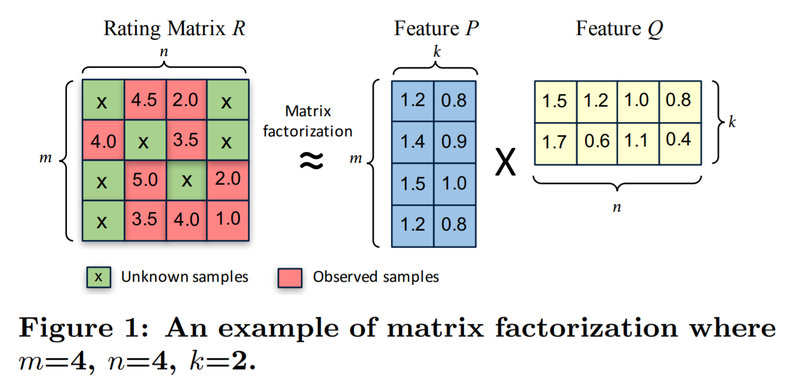

**(m,n) 사이즈의 행렬 R**을 **(m,k) 사이즈의 행렬 P**와 **(k,n) 사이즈의 행렬 Q**로 분해한다면 

R이란 그저 **P와 Q의 행렬곱으로 표현 가능할 수 있다는 간단한 아이디어**

대체로 **k는 m이나 n보다 훨씬 작은 값**이기 때문에 **계산량 측면으로도 훨씬 유리해짐**

하지만 아이디어의 단순함에도 불구하고 MF 모델은 성능이 준수하고 Scalability가 좋아서 많이 사용되는 모델

####  MF 모델을 <사용자에게 영화를 추천하는 모델>에 대입
- m=4, n=5, k=2인 MF 모델

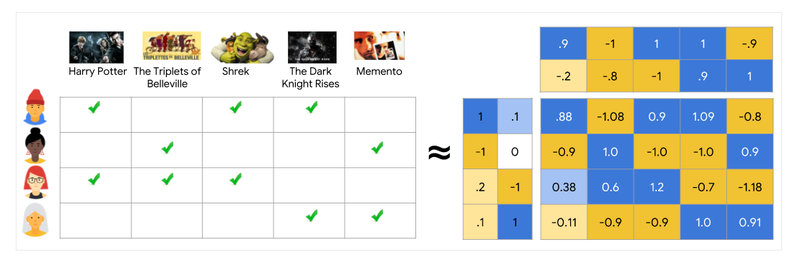

- **(m, k) 사이즈의 Feature Matrix P**는 k 차원의 벡터를 **사용자 수**만큼 모아놓은 행렬

아래 그림에서 첫 번째 벡터 $P_0$ =(1, 0.1)은 바로 빨간 모자를 쓴 첫 번째 사용자의 특성(Feature) 벡터

같은 방식으로 $Q$ 행렬의 첫 번째 벡터 $Q_0$=(0.9, -0.2)는 해리포터 영화의 특성 벡터

MF 모델은 이 **두 벡터를 내적**해서 얻어지는 0.88이 바로 $R_{0,0}$으로 정의되는 사용자의 영화 선호도로 보는 모델

벡터를 곱했을 때 **1에 가까워야** 모델이 잘 학습하는 것

### 모델의 목표는 모든 유저와 아이템에 대해 k-dimension의 벡터를 잘 만드는 것

- 기준 :  유저 $i$의 벡터$(U_i)$와 아이템 $j$의 벡터$(I_j)$를 내적했을 때, 유저 $i$가 아이템 $j$에 대해 평가한 수치$(M_{ij})$와 비슷한지
### $U_i$ ⋅$I_j$ = $M_{ij}$


# CSR(Compressed Sparse Row) Matrix

- **Sparse한 matrix**에서 0이 아닌 유효한 데이터로 채워지는 **데이터의 값과 좌표 정보만으로 구성**하여 


- 메모리 사용량을 최소화하면서도 Sparse한 matrix와 동일한 행렬을 표현할 수 있도록 하는 데이터 구조

유저는 36만 명이고 아티스트는 29만 명

이를 행렬로 표현하고, 행렬의 각 원소에 정수 한 개 (1byte)가 들어간다면

36만 * 29만 * 1byte $\approx$ 97GB가 필요

유저 수 X 아티스트 수만큼의 정보 안에는 **유저가 들어보지 않은 아티스트에 대한 정보까지 모두 행렬에 포함되어 계산되기 때문**

아무리 많은 아티스트를 들어 본 유저도 수백 명을 넘어갈 만큼의 아티스트를 들어보지 못했는데, 

총 아티스트는 29만 명이 넘기 때문에 **평가행렬 내의 대부분의 공간은 0으로 채워짐**

이런 행렬을 Sparse Matrix

이런 메모리 낭비를 최소화하기 위해 

**유저가 들어본 아티스트에 대해서만 정보만을 저장하면서 전체 행렬 형태를 유추할 수 있는 데이터 구조가 필요**

이런 경우, 좋은 대안이 되는 것이 CSR(Compressed Sparse Row) Matrix

-----------------

"행렬 중 일부는 데이터가 채워져 있지만, 나머지 부분은 데이터가 비어 있다"는게, 

a라는 유저가 Z라는 가수의 노래를 play하지 않았을 때 데이터가 비어있다는 것으로 이해되는데, 

그러면 그냥 0을 넣거나 0에 가까운 값으로 채우면 되지 않을까 싶다.

아마 그러지 않는 것을 보면 성능에 좋은 영향을 주지 않아서일텐데 이유가 궁금했다.

그저 0으로 채워서 계산을 하면 위에서 언급한 것과 같이 메모리가 기하급수적으로 폭증하기 때문에 CSR을 사용해 메모리 효율을 높이는 것이었다.

------------------

## CSR Matrix는 data, indices, indptr 로 행렬을 압축하여 표현

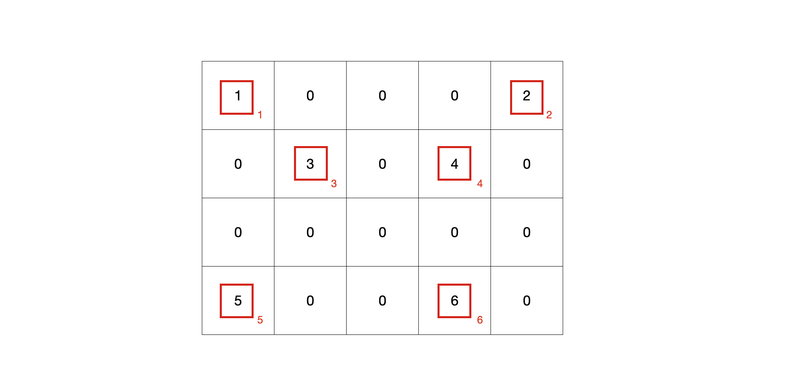

### data - 0이 아닌 원소를 차례로 기입한 값
- data = [1, 2, 3, 4, 5, 6]
    
        (행을 기준으로 - 1행의 원소, 2행의 원소, 4행의 원소 순)

### indices - data의 각 요소가 어느 열(column)에 있는지를 표현한 index

- indices = [0, 4, 1, 3, 0, 3]

1은 0번째 열, 

2는 4번째 열,

3은 1번째 열 ...

### indptr - 각 행(row)에서 0이 아닌 첫 번째 원소가 data 리스트에서 몇 번째에 해당하는지와 마지막에 data 벡터의 길이를 추가한 값

- 이를 통해 data의 요소들이 어느 행(row)에 있는지를 알 수 있지만 예시의 세 번째 행처럼 0이 아닌 원소가 없는 경우엔 그 다음 행의 값과 같은 값을 넣음


- indptr = [0, 2, 4, 4, 6]

참고 링크 : https://youtu.be/Qi7FcjN7nsc

처음 이 개념이 너무 이해가 안가서 부가 설명을 찾아보다가 똑부러지는 영상을 하나 발견했다.

indptr 리스트의 각각의 값은 **0이 아닌 첫 번째 원소의 data 리스트에서의 인덱스**를 나타낸다.

즉, 

data= [1, 2, 3, 4, 5, 6], 

indptr=[0, 2, 4, 4, 6]이라는 것은


0 : 첫 번 째 행의 시작 원소 -> data[0]의 원소 = 1

2 : 두 번 째 행의 시작 원소 -> data[2]의 원소 = 3

그렇다면 첫 번 째 행의 원소 = 1, 2가 된다.

4(indptr[3]) : 네 번 째 행의 시작 원소 -> data[4] 원소 = 5

그렇다면 두 번 째 행의 원소 = 3, 4가 된다.

4가 두 번 나온건 3번 째 행이 0으로 이루어진 행이기 때문에 네 번 째 행의 원소 = 5, 6이다.

indptr 리스트의 마지막 값 6은 데이터 리스트에 들어있는 원소의 총 개수를 뜻한다.

In [35]:
from scipy.sparse import csr_matrix

num_user = movie_ratings['user_id'].nunique()
num_movie = movie_ratings['movie_id'].nunique()

csr_data = csr_matrix((movie_ratings['counts'], (movie_ratings.user_id, movie_ratings.movie_id)), shape=(num_user, num_movie))
csr_data

<6040x3633 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Row format>

# MF 모델 학습
-  Matrix Factorization 모델을 implicit 패키지를 사용하여 학습


- **implicit 패키지** : 암묵적(implicit) dataset을 사용하는 다양한 모델을 굉장히 빠르게 학습할 수 있는 패키지

- **als(AlternatingLeastSquares) 모델** 

: Matrix Factorization에서 쪼개진 두 Feature Matrix를 한꺼번에 훈련하는 것은 잘 수렴하지 않기 때문에, 

**한쪽을 고정시키고 다른 쪽을 학습하는 방식을 번갈아 수행**하는 AlternatingLeastSquares 방식이 효과적

In [36]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

#implicit 라이브러리에서 권장하고 있는 부분. 학습내용과는 무관
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

## AlternatingLeastSquares 클래스의 __init__ 파라미터

- **factors** : 유저와 아이템의 벡터를 몇 차원으로 할 것인지


- **regularization** : 과적합을 방지하기 위해 정규화 값을 얼마나 사용할 것인지


- **use_gpu** : GPU를 사용할 것인지


- **iterations** : epochs와 같은 의미. 데이터를 몇 번 반복해서 학습할 것인지


factors와 iterations를 늘릴수록 학습 데이터를 잘 학습하게 되지만 과적합의 우려가 있으니 좋은 값을 찾아야 함

### Implicit AlternatingLeastSquares 모델 선언

In [37]:
als_model = AlternatingLeastSquares(factors=100,
                                    regularization=0.01,
                                    use_gpu=False,
                                    iterations=15,
                                    dtype=np.float32)

### als 모델은 input으로 (item X user) 꼴의 matrix를 받기 때문에 Transpose

In [38]:
csr_data_transpose = csr_data.T
csr_data_transpose

<3633x6040 sparse matrix of type '<class 'numpy.int64'>'
	with 836483 stored elements in Compressed Sparse Column format>

## 모델 훈련

In [39]:
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

### 확인 사항

- 내 아이디(user_id = 6041) 벡터와 About Time의 벡터를 어떻게 만들고 있는지


- 두 벡터를 곱하면 어떤 값이 나오는지


In [41]:
been, abouttime = user_to_idx['been'], movie_to_idx['About Time (2013)']
been_vector, abouttime_vector = als_model.user_factors[been], als_model.item_factors[abouttime]

In [42]:
been_vector

array([-0.0107165 , -0.01010375, -0.05135853,  0.03009407, -0.02006278,
       -0.0051859 ,  0.00545314, -0.02681729,  0.02524319,  0.02577847,
        0.0067979 , -0.0070874 ,  0.00786801,  0.01420789, -0.01564324,
        0.0205472 ,  0.00274955,  0.0182872 ,  0.02582647, -0.00946932,
        0.00720202,  0.04109431, -0.00823079, -0.00029226,  0.0075877 ,
       -0.01260002, -0.00377909, -0.00528789,  0.00249024, -0.01635013,
        0.00483281,  0.02313066, -0.01099132,  0.01658548,  0.0092047 ,
        0.00632732,  0.00039349, -0.02344963,  0.00647502,  0.01082734,
       -0.01919439,  0.00364718, -0.01023049, -0.00645028, -0.01264178,
        0.00180391, -0.02230442, -0.01273549,  0.0152547 , -0.01196399,
        0.00958215,  0.00568558, -0.02487079,  0.02265708,  0.01158857,
        0.02233696,  0.00594404,  0.00338495, -0.01595082,  0.00561173,
        0.00116292, -0.00253205, -0.01957307,  0.00963716, -0.01089847,
       -0.0229541 , -0.02238078,  0.02591085, -0.02595798,  0.01

In [43]:
# been과 abouttime을 내적하는 코드 -> 선호도
np.dot(been_vector, abouttime_vector)

0.0005561192

가장 좋아하는 영화인데 선호도가 0.0005로 아주 낮게 예측되었다.

모델의 성능이 좋지 않다는 것을 확인했다.

- 훈련된 모델이 예측하는 Toy Story (1995)에 대한 선호도

In [44]:
been, toystory = user_to_idx['been'], movie_to_idx['Toy Story (1995)']
been_vector, toystory_vector = als_model.user_factors[been], als_model.item_factors[toystory]

In [45]:
np.dot(been_vector, toystory_vector)

-0.00018036213

토이스토리 또한 좋아하는 영화인데 마이너스의 선호도가 예측되었다.

# 비슷한 영화 찾기
- similar_items 메서드

In [46]:
favorite_movie = 'About Time (2013)'
movie_id = movie_to_idx[favorite_movie]
similar_movie = als_model.similar_items(movie_id, N=15)
similar_movie

#(아티스트의 id, 유사도) Tuple 로 반환

[(3628, 1.0000001),
 (3632, 0.9992982),
 (3631, 0.99666107),
 (3629, 0.99458146),
 (3630, 0.99384195),
 (3575, 0.9755706),
 (3578, 0.97555304),
 (3576, 0.9743756),
 (3579, 0.9727211),
 (3583, 0.97223717),
 (3573, 0.97206545),
 (3574, 0.97161084),
 (3580, 0.9712574),
 (3587, 0.9702321),
 (3572, 0.9701108)]

- 영화의 id를 다시 영화의 이름으로 출력

In [47]:
#movie_to_idx 를 뒤집어, index로부터 movie의 이름을 얻는 dict를 생성
idx_to_movie = {v:k for k,v in movie_to_idx.items()}

In [48]:
[idx_to_movie[i[0]] for i in similar_movie]

['About Time (2013)',
 'The Witch (2018)',
 'The Devil Wears Prada (2006)',
 'Avengers (2012)',
 '500 Days of Summer (2009)',
 "Brother's Kiss, A (1997)",
 'Number Seventeen (1932)',
 'War at Home, The (1996)',
 'Last of the High Kings, The (a.k.a. Summer Fling) (1996)',
 'Neon Bible, The (1995)',
 'Male and Female (1919)',
 'Century (1993)',
 "Another Man's Poison (1952)",
 'Shopping (1994)',
 "I Don't Want to Talk About It (De eso no se habla) (1993)"]

- 위의 과정을 함수화

In [55]:
def get_similar_movie(movie_name: str):
    movie_id = movie_to_idx[movie_name]
    similar_movie = als_model.similar_items(movie_id)
    similar_movie = [idx_to_movie[i[0]] for i in similar_movie]
    return similar_movie

In [56]:
get_similar_movie('Toy Story (1995)')

['Toy Story (1995)',
 'Toy Story 2 (1999)',
 'Babe (1995)',
 'Aladdin (1992)',
 "Bug's Life, A (1998)",
 'Groundhog Day (1993)',
 'Lion King, The (1994)',
 'Beauty and the Beast (1991)',
 "There's Something About Mary (1998)",
 'Pleasantville (1998)']

Toy Story와 비슷한 영화로 Toy Story2를 가장 먼저 출력하는 것을 보면

너무 나쁜 성능이라고 볼 수는 없을 것 같다.

또한 애니메이션 위주로 결과가 나온 것을 보아 나름 비슷한 영화를 추천해주었다고 볼 수 있다.

# 영화 추천받기

- recommend 메서드
- **filter_already_liked_items** : 유저가 이미 평가한 아이템은 제외하는 Argument

In [58]:
user = user_to_idx['been']
# recommend에서는 user*item CSR Matrix를 받음
movie_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
movie_recommended

[(60, 0.006892972),
 (811, 0.0067176567),
 (707, 0.005680249),
 (669, 0.0056272843),
 (2229, 0.0050466727),
 (126, 0.0049933535),
 (2539, 0.0049647186),
 (29, 0.0049210684),
 (2044, 0.004863701),
 (2562, 0.0047720643),
 (2106, 0.004752803),
 (241, 0.0047398517),
 (3309, 0.0047316565),
 (1570, 0.0046865875),
 (224, 0.004652417),
 (2381, 0.0046456824),
 (648, 0.004626046),
 (1508, 0.004622547),
 (3000, 0.004581298),
 (689, 0.004522972)]

In [60]:
[idx_to_movie[i[0]] for i in movie_recommended]

['Star Wars: Episode I - The Phantom Menace (1999)',
 'Thomas Crown Affair, The (1999)',
 'Sting, The (1973)',
 'Man on the Moon (1999)',
 'Thieves (Voleurs, Les) (1996)',
 'Shakespeare in Love (1998)',
 'Stalker (1979)',
 'Close Shave, A (1995)',
 'Drunken Master (Zui quan) (1979)',
 'Last Night (1998)',
 'Phantom of the Opera, The (1943)',
 'Pillow Book, The (1995)',
 'Hollow Reed (1996)',
 'Dance with Me (1998)',
 'L.A. Confidential (1997)',
 'Open Your Eyes (Abre los ojos) (1997)',
 'Lethal Weapon (1987)',
 'Fantasia 2000 (1999)',
 'Female Perversions (1996)',
 'Anne Frank Remembered (1995)']

원래 영화를 자주 보거나 영화보는 것을 딱히 즐기지 않는다.

좋아하는 영화도 거의 손에 꼽을 정도로 적고, 이제까지 본 영화의 종류도 몇 개 되지 않는다. 

그래서 어떤 영화가 있는 지 잘 모른다.

태어나기 전 영화, 1-3살 때 영화들을 추천받아서 이게 내 취향이 맞는 영화를 알려준 건지 아닌지 영화 제목만으로 알기 어렵다.

하지만 위에서 가장 좋아하는 About Time에 대한 선호도를 0.0005로 출력하는 것을 보았을 때,

모델이 추천한 영화들은 아마 내 취향과는 거리가 멀 것이라고 생각한다.

## 기여도

In [76]:
StarWars = movie_to_idx['Star Wars: Episode I - The Phantom Menace (1999)']
explain = als_model.explain(user, csr_data, itemid=StarWars)

In [77]:
[(idx_to_movie[i[0]], i[1]) for i in explain[1]]

[('The Witch (2018)', 0.002116741117154086),
 ('About Time (2013)', 0.002102233394064869),
 ('Avengers (2012)', 0.001946599586810447),
 ('The Devil Wears Prada (2006)', 0.0018785429492688874),
 ('500 Days of Summer (2009)', 0.0015428231424502402)]

Star Wars를 추천함에 있어 The Witch 의 기여도가 가장 크고 500 Days of Summer의 기여도가 가장 낮다.

위 5개의 영화 중 SF 영화는 없는데 스타워즈가 나온 게 신기하다.

# 하이퍼 파라미터 튜닝
- 모델의 하이퍼파라미터를 조정하여 다시 학습시킨 후 선호도를 예측하고자 한다.

In [73]:
als_model_2 = AlternatingLeastSquares(factors=500,
                                    regularization=0.05,
                                    use_gpu=False,
                                    iterations=30,
                                    dtype=np.float32)

In [74]:
als_model_2.fit(csr_data_transpose)

  0%|          | 0/30 [00:00<?, ?it/s]

- About Time (2013)에 대한 선호도

In [65]:
been, abouttime = user_to_idx['been'], movie_to_idx['About Time (2013)']
been_vector_2, abouttime_vector_2 = als_model_2.user_factors[been], als_model_2.item_factors[abouttime]

In [66]:
np.dot(been_vector_2, abouttime_vector_2)

2.9909303e-05

### Toy Story (1995)에 대한 선호도

In [67]:
been, toystory = user_to_idx['been'], movie_to_idx['Toy Story (1995)']
been_vector_2, toystory_vector_2 = als_model_2.user_factors[been], als_model_2.item_factors[toystory]

In [68]:
np.dot(been_vector_2, toystory_vector_2)

4.208531e-05

### 비슷한 영화 찾기

In [70]:
def get_similar_movie_2(movie_name: str):
    movie_id = movie_to_idx[movie_name]
    similar_movie = als_model_2.similar_items(movie_id)
    similar_movie = [idx_to_movie[i[0]] for i in similar_movie]
    return similar_movie

In [71]:
get_similar_movie_2('Toy Story (1995)')

['Toy Story (1995)',
 'Toy Story 2 (1999)',
 'Aladdin (1992)',
 'Babe (1995)',
 "Bug's Life, A (1998)",
 'Groundhog Day (1993)',
 'Lion King, The (1994)',
 'Beauty and the Beast (1991)',
 "There's Something About Mary (1998)",
 "Wayne's World (1992)"]

### 영화 추천받기

In [80]:
user = user_to_idx['been']
# recommend에서는 user*item CSR Matrix를 받음
movie_recommended_2 = als_model_2.recommend(user, csr_data, N=20, filter_already_liked_items=True)
[idx_to_movie[i[0]] for i in movie_recommended_2]

['Rocketeer, The (1991)',
 'Kalifornia (1993)',
 'Blair Witch Project, The (1999)',
 'Agnes Browne (1999)',
 'Not One Less (Yi ge dou bu neng shao) (1999)',
 'Maya Lin: A Strong Clear Vision (1994)',
 '20 Dates (1998)',
 'Day of the Beast, The (El Día de la bestia) (1995)',
 'Universal Soldier: The Return (1999)',
 'Giant Gila Monster, The (1959)',
 'For All Mankind (1989)',
 'Whipped (2000)',
 'Gods Must Be Crazy II, The (1989)',
 'Last Days, The (1998)',
 'Dinner Game, The (Le Dîner de cons) (1998)',
 'Land Girls, The (1998)',
 'Mating Habits of the Earthbound Human, The (1998)',
 'Street Fighter (1994)',
 'Window to Paris (1994)',
 "Ed's Next Move (1996)"]

### 기여도

In [81]:
Rocketeer = movie_to_idx['Rocketeer, The (1991)']
explain_2 = als_model_2.explain(user, csr_data, itemid=Rocketeer)

In [82]:
[(idx_to_movie[i[0]], i[1]) for i in explain_2[1]]

[('500 Days of Summer (2009)', 0.007336804408848859),
 ('The Witch (2018)', 0.007168756034242086),
 ('Avengers (2012)', 0.007153308506401871),
 ('About Time (2013)', 0.006975925175074057),
 ('The Devil Wears Prada (2006)', 0.006967181447798534)]

# 회고

내가 좋아하는 영화에 대한 정보가 적기 때문에 이러한 결과가 도출된 것 같다.

겨우 5개밖에 되지 않는 나의 선호로 어떻게 추천받을 수 있을까 싶다.

이용자의 입장에선 5개의 정보만 주고도 정확하고 마음에 드는 추천을 받고 싶지만,

만드는 사람의 입장에선 한 사용자에 대해 적어도 수십, 수백개의 데이터가 있었으면 한다.

그동안 넷플릭스를 사용하면서 추천받은 프로그램들이 별로 마음에 안들어서 불평했는데,

내가 찜한 컨텐츠 리스트에 좋아하는 프로그램을 조금 더 추가해 놓아야겠다는 생각이 들었다.